# Building Random Forest Classifier model to identify the highly influencing feature for Sales

### Importing essential libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the data
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\15. Random Forests\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
#check for missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
# Describe the data
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


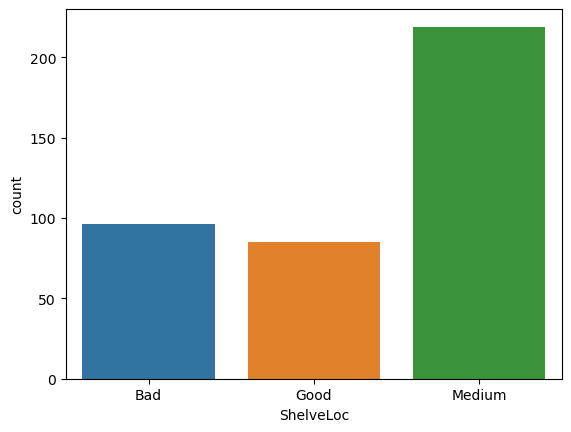

In [23]:
# ShelveLoc feature data Represenation on a histogram
print(df['ShelveLoc'].value_counts())
sns.countplot(x='ShelveLoc',data=df)
plt.show()

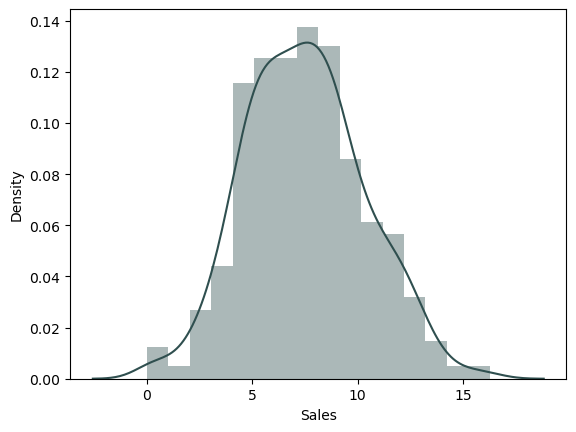

In [43]:
# Representation of Income range of the customers
sns.distplot(df['Sales'], color='darkslategrey')
plt.show()

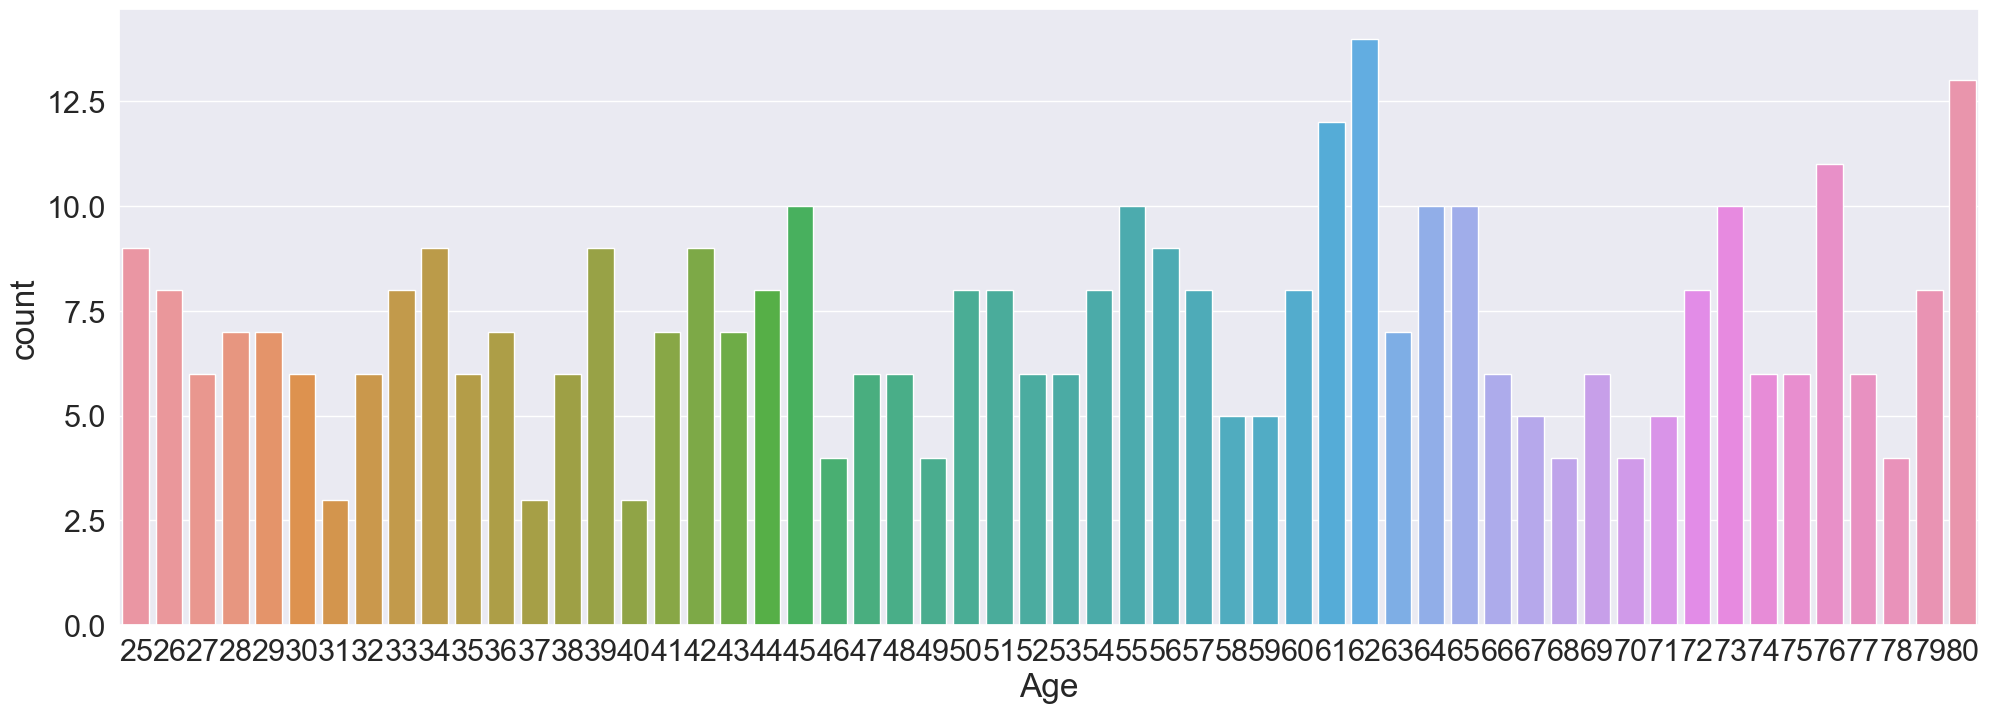

In [63]:
# Representation of Age with count plot
fig, ax = plt.subplots(figsize=(24,8))
sns.countplot(df['Age'],ax=ax)
sns.set(font_scale=3)
plt.show()

In [78]:
# Converting Numerical to Categorical for target variable 
sales=[]
for row in df['Sales']:
    if row<7.49: sales.append('Bad')
    elif row>=7.49: sales.append('Good')

In [81]:
sales[0:5]

['Good', 'Good', 'Good', 'Bad', 'Bad']

In [85]:
df['sales_label']=sales
df1=df.drop(columns='Sales')

In [86]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,0,42,17,1,1,Good
1,111,48,16,260,83,1,65,10,1,1,Good
2,113,35,10,269,80,2,59,12,1,1,Good
3,117,100,4,466,97,2,55,14,1,1,Bad
4,141,64,3,340,128,0,38,13,1,0,Bad


In [89]:
# Lets convert Categorical data into numerical data by using labelEncoder
from sklearn.preprocessing import LabelEncoder
cols=['ShelveLoc','Urban','US','sales_label']
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)

In [91]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [92]:
# lets define the Independent and Dependent variables
array=df1.values
x=array[:,0:-1]
y=array[:,-1]

In [93]:
#Independent Variables data in array matrix format
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [95]:
#Independent variable data in array matrix format
y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

# Building Random Forest Classifier algorithm

In [101]:
# Lets build the algorithm

#split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

model=RandomForestClassifier(n_estimators=100, max_features=3)

In [102]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [104]:
pred=model.predict(x_test)
pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [120]:
# Test model Accuracy
Accuracy=(np.mean(pred==y_test))*100
print('Accuracy for the testing model is:', Accuracy,'%')

Accuracy for the testing model is: 80.0 %


In [121]:
kfold=KFold(n_splits=10, random_state=None)
results=cross_val_score(model,x_train,y_train,cv=kfold)
results

array([0.84375, 0.8125 , 0.78125, 0.8125 , 0.75   , 0.8125 , 0.78125,
       0.84375, 0.8125 , 0.84375])

In [122]:
#Training model accuracy
accuracy=results.mean()*100
print('Accuracy for the training model is:',accuracy,'%')

Accuracy for the training model is: 80.9375 %


## Conclusion: Accuracy for the training data set is 80.6% and for the testing data it is 80%, hence we have built a best suitable Random Forest machine learning model for the given datset successfully